In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/ai-developer-productivity-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-developer-productivity-dataset


In [29]:
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv


In [30]:
import pandas as pd
df = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [31]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [32]:
# prompt: Explore the dataset: check feature types, class distribution, and missing values

# Explore feature types
print(df.info())

# Check class distribution of the target variable (assuming the last column is the target)
print("\nClass Distribution:")
print(df.iloc[:, -1].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

Class Distribution:
task_success
1    303
0    197
Name: count, dtype: int64

Missing Values:
hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64


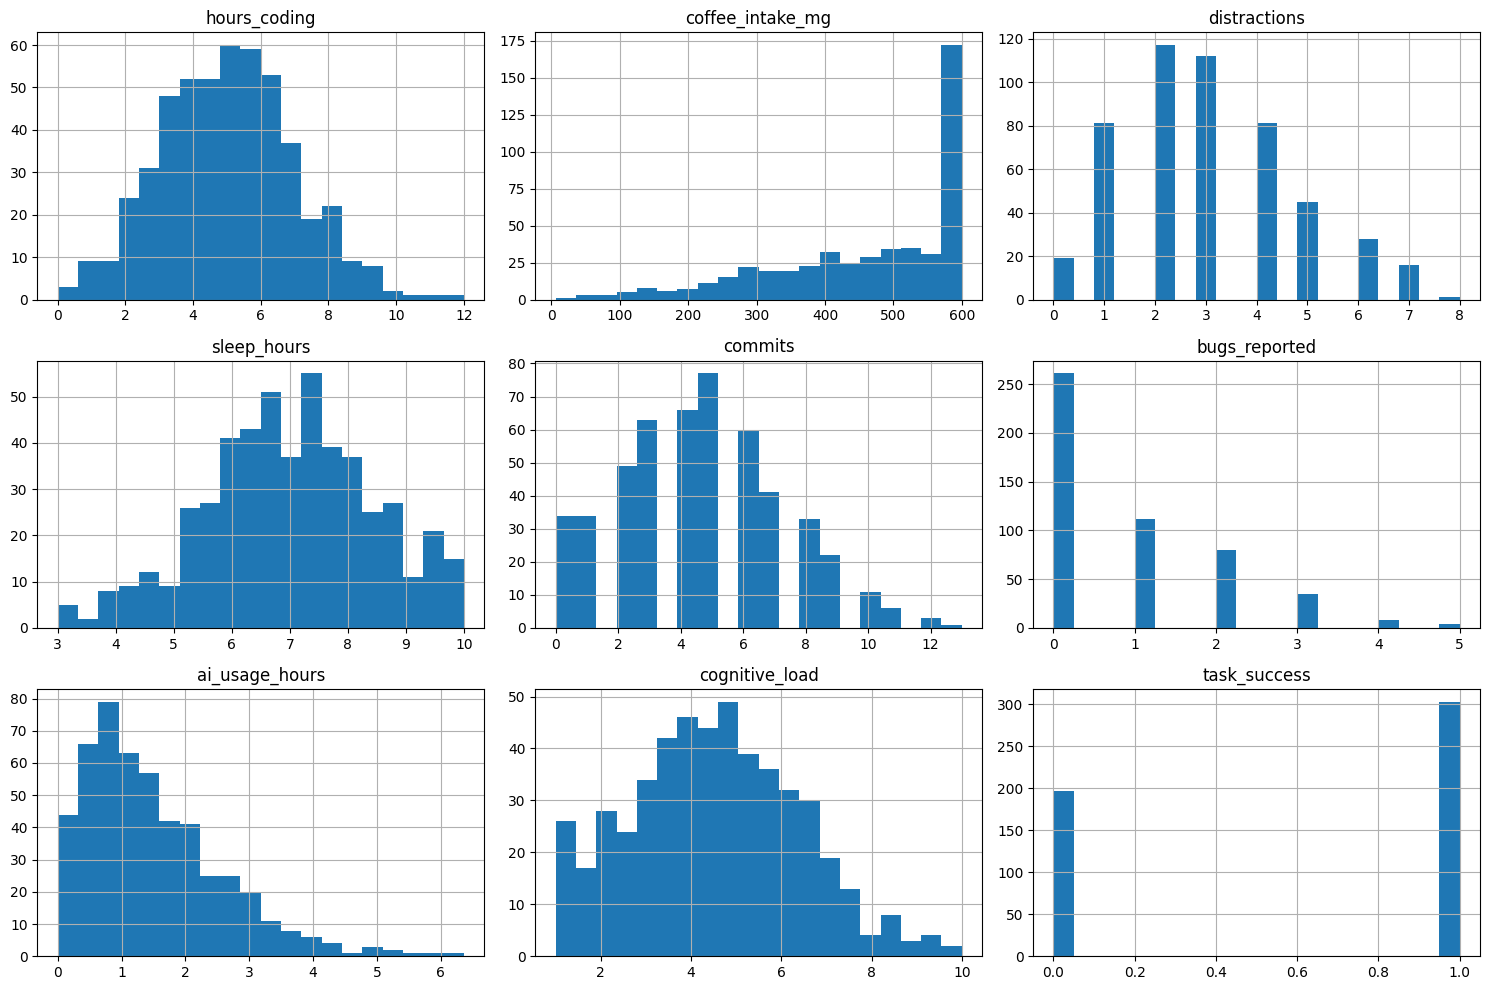

In [33]:
# prompt: bargraph for each column feature in df dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for histogram visualization
df_numeric = df.select_dtypes(include=[np.number])

# Plot histograms for each numeric feature
df_numeric.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


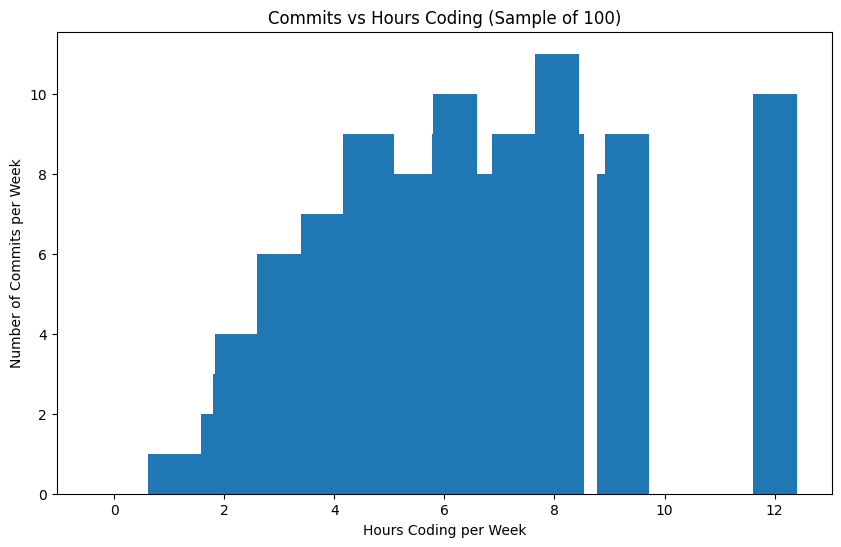

In [34]:
# prompt: bar graph for hours coding vs commits take 100 samples

# Take a sample of 100 rows
df_sample = df.sample(n=100, random_state=42)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_sample['hours_coding'], df_sample['commits'])
plt.xlabel('Hours Coding per Week')
plt.ylabel('Number of Commits per Week')
plt.title('Commits vs Hours Coding (Sample of 100)')
plt.show()

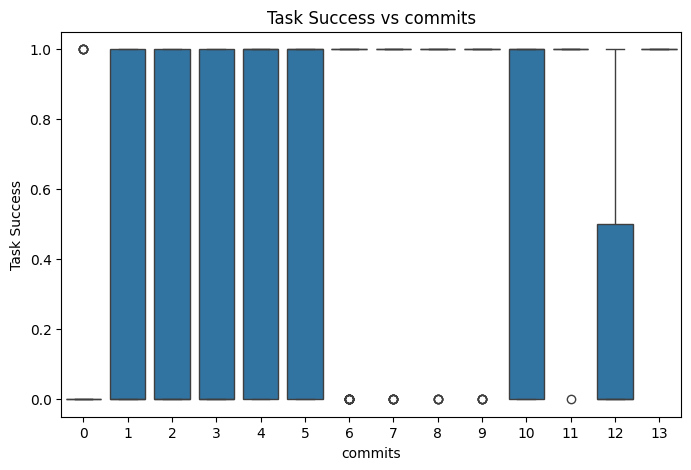

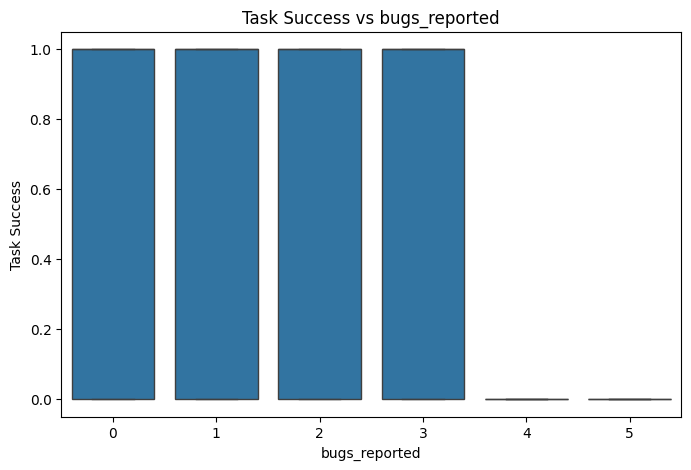

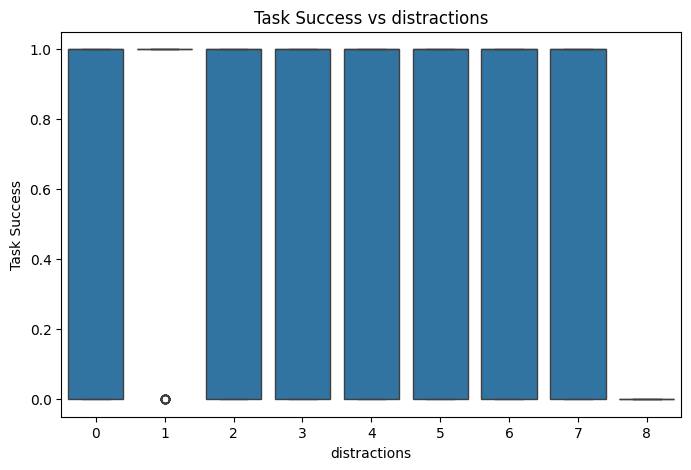

In [37]:
# prompt: perform Exploratory Data Analysis (EDA) on df dataset which describes ai developers productivity

# Visualize relationships between selected features and the target variable
# Using box plots for categorical/binary features and scatter plots for continuous features

# Identify categorical/binary and continuous features (based on inspection of df.info() and data characteristics)
categorical_features = [ 'commits', 'bugs_reported','distractions'] # Example: Assuming these are categorical or have few unique values vs'task_success'
continuous_features = ['hours_coding', 'coffee_intake_mg', 'cognitive_load', 'sleep_hours'] # Example: Assuming these are continuous

# Plotting relationships for categorical/binary features with the target (task_success)
for feature in categorical_features:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=feature, y='task_success', data=df)
  plt.title(f'Task Success vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('Task Success')
  plt.show()

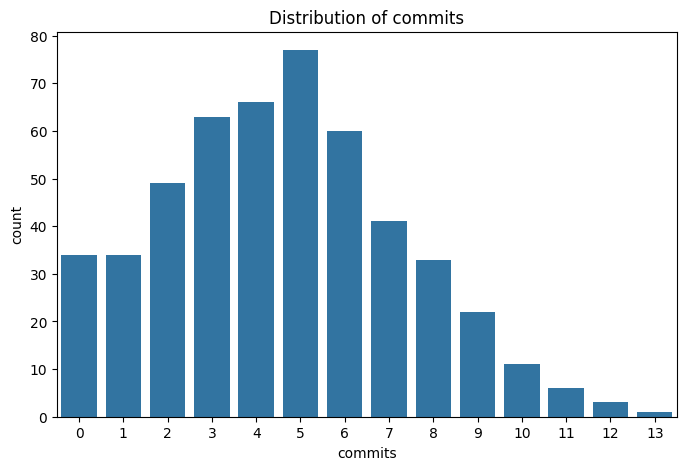

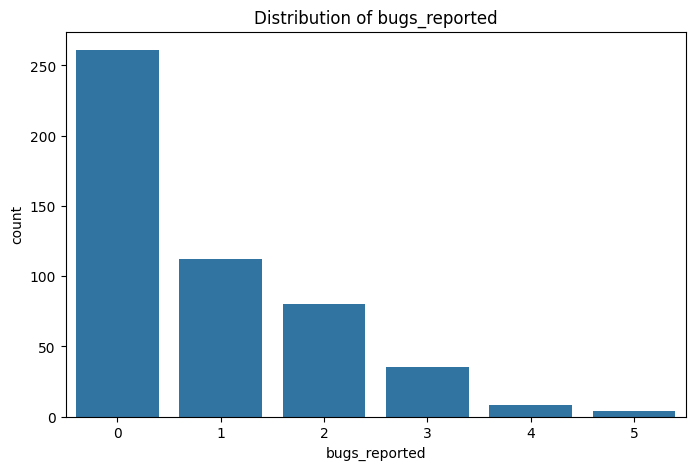

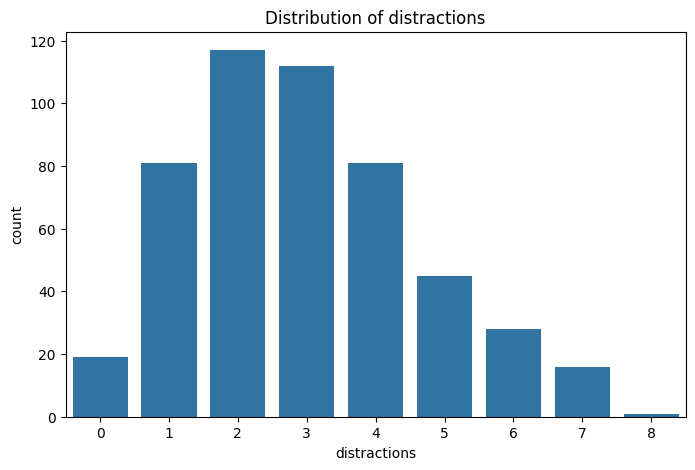

In [38]:
# - Analyze the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

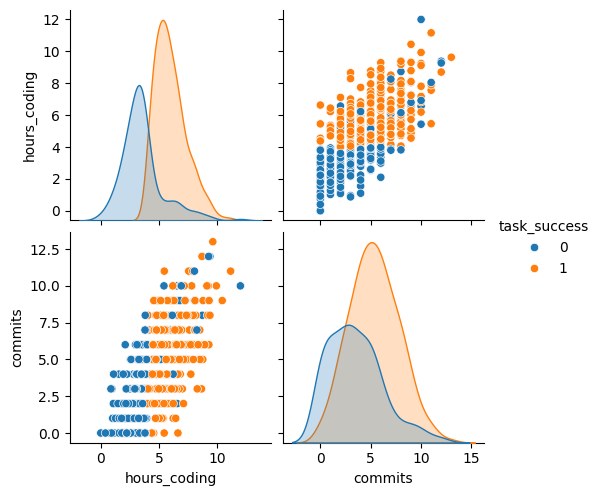

In [39]:
# Additional EDA steps:
sns.pairplot(df[['hours_coding', 'commits', 'task_success']], hue='task_success')
plt.show()

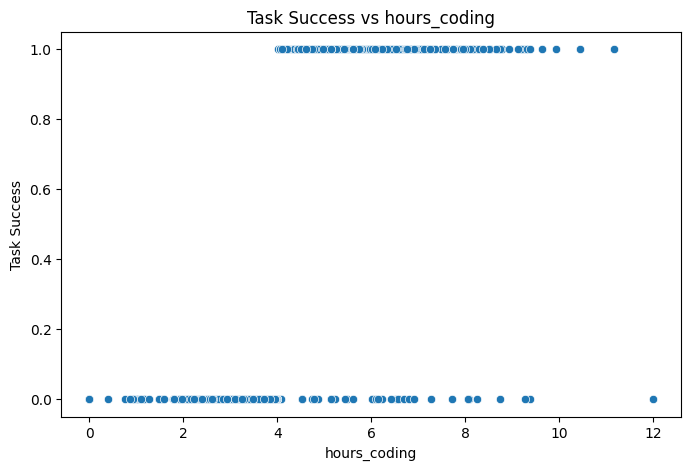

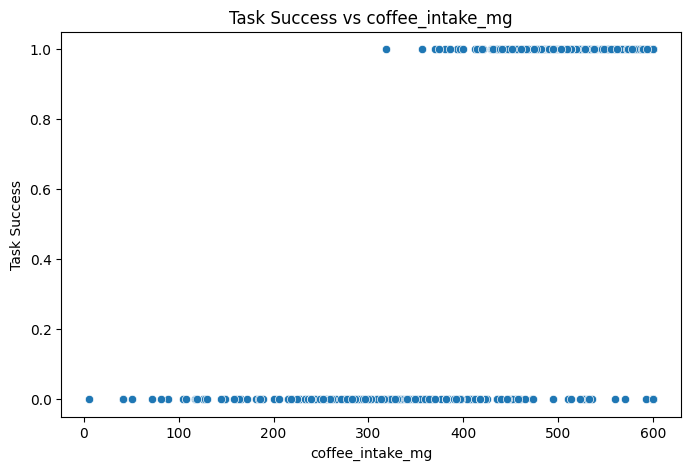

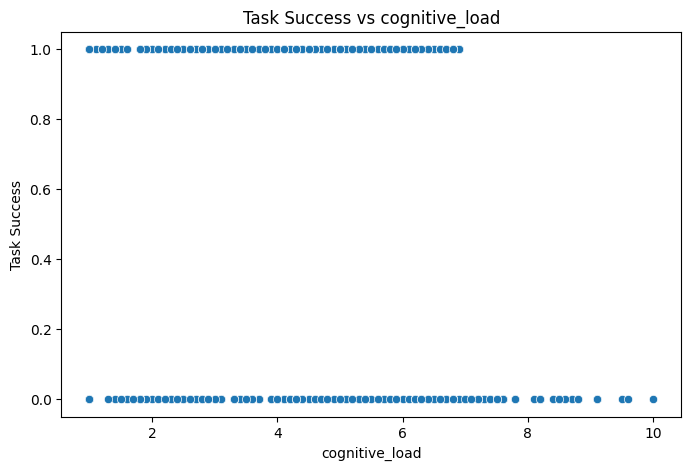

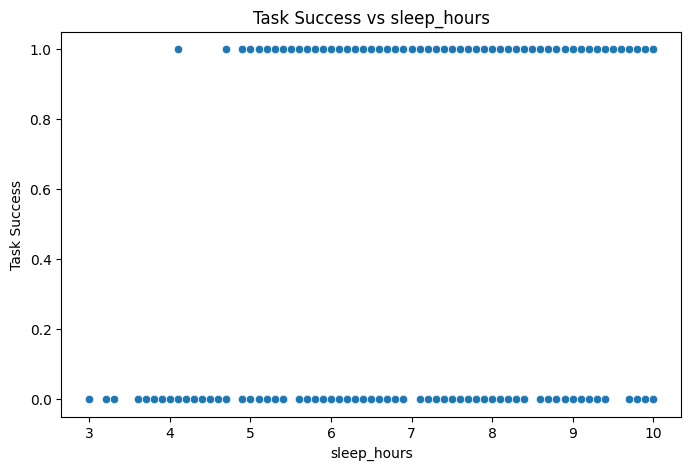

In [40]:
# Plotting relationships for continuous features with the target (task_success)
for feature in continuous_features:
  plt.figure(figsize=(8, 5))
  sns.scatterplot(x=feature, y='task_success', data=df)
  plt.title(f'Task Success vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('Task Success')
  plt.show()

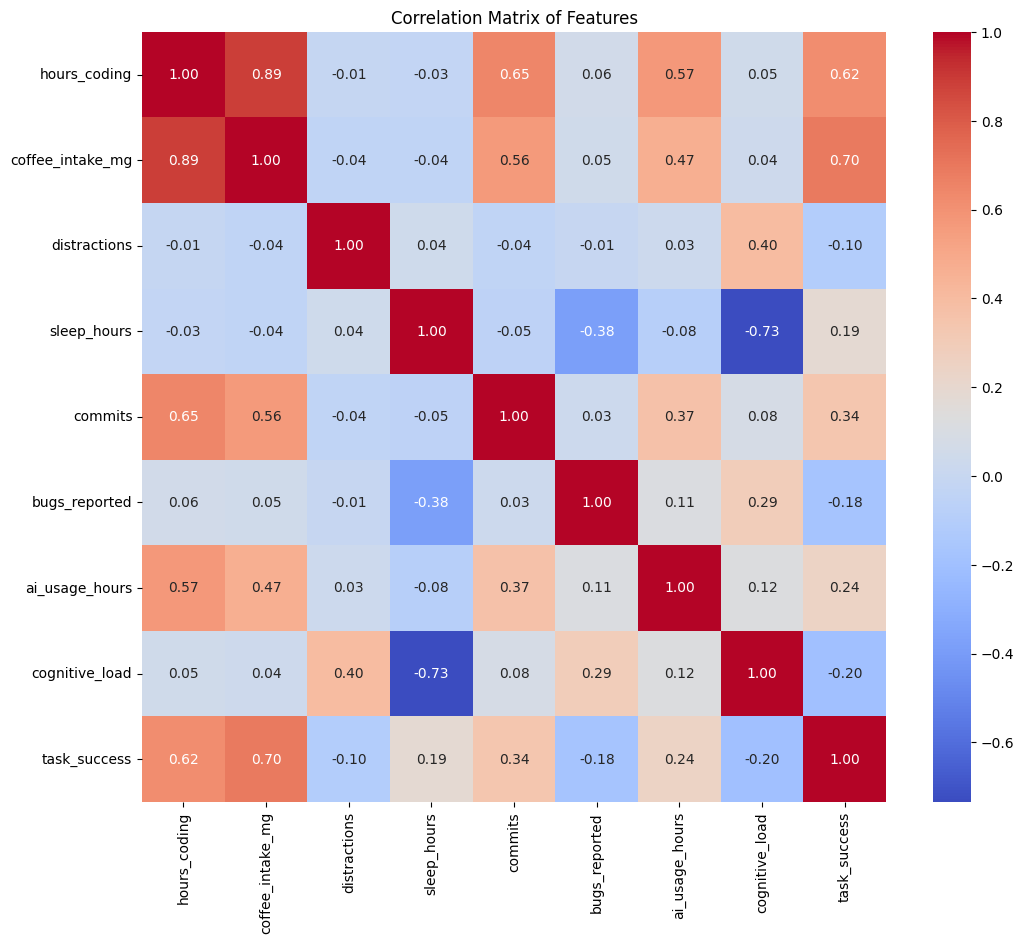


Correlation with Target Variable (task_success):
task_success        1.000000
coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
sleep_hours         0.186662
distractions       -0.104303
bugs_reported      -0.178226
cognitive_load     -0.199840
Name: task_success, dtype: float64

Features strongly correlated with task_success (absolute correlation > 0.23):


,task_success
coffee_intake_mg,0.695185
hours_coding,0.615528
commits,0.338944
ai_usage_hours,0.241668


In [76]:
# prompt: provide correlation analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix (optional, can be large)
# print("\nCorrelation Matrix:")
# print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Focus on correlations with the target variable
target_correlation = correlation_matrix['task_success'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (task_success):")
print(target_correlation)

# Display correlations above a certain threshold
threshold = 0.23 # Define a threshold for strong correlation
strong_correlations = target_correlation[(target_correlation.abs() > threshold) & (target_correlation.index != 'task_success')]
print(f"\nFeatures strongly correlated with task_success (absolute correlation > {threshold}):")
strong_correlations

In [77]:
from sklearn.model_selection import train_test_split

task_success_col_index = df.columns.get_loc('task_success')
# Separate features and target
X = df.drop(df.columns[task_success_col_index], axis=1) # Assuming the last column is the target
y = df[df.columns[task_success_col_index]]

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)

print("\nClass Distribution in Training Data:")
print(y_train.value_counts())

print("\nClass Distribution in Testing Data:")
print(y_test.value_counts())


Shape of training data (X_train, y_train): (400, 8) (400,)
Shape of testing data (X_test, y_test): (100, 8) (100,)

Class Distribution in Training Data:
task_success
1    242
0    158
Name: count, dtype: int64

Class Distribution in Testing Data:
task_success
1    61
0    39
Name: count, dtype: int64


In [78]:
# Identify features to keep based on strong correlation with the target variable
# We already calculated `strong_correlations` which contains features with absolute correlation > threshold
features_to_keep = strong_correlations.index.tolist()

print(f"\nFeatures selected based on strong correlation: {features_to_keep}")

# Select the important features in the training data (resampled)
X_train_selected = X_train[features_to_keep]

# Select the important features in the testing data
X_test_selected = X_test[features_to_keep]

print("\nShape of selected training data:", X_train_selected.shape)
print("Shape of selected testing data:", X_test_selected.shape)

print("\nHead of selected training data:")
print(X_train_selected.head())

print("\nHead of selected testing data:")
print(X_test_selected.head())


Features selected based on strong correlation: ['coffee_intake_mg', 'hours_coding', 'commits', 'ai_usage_hours']

Shape of selected training data: (400, 4)
Shape of selected testing data: (100, 4)

Head of selected training data:
     coffee_intake_mg  hours_coding  commits  ai_usage_hours
435               490          5.15        8            1.14
54                600          7.06        6            0.62
154               600          5.59        2            0.38
71                600          8.08        8            0.58
195               562          5.77        7            1.19

Head of selected testing data:
     coffee_intake_mg  hours_coding  commits  ai_usage_hours
207               600          6.03        3            0.86
234               600          9.29        6            5.33
77                479          4.40        0            0.19
130               105          1.90        0            0.71
339               377          3.87        6            0.40



Logistic Regression Model Evaluation:
Accuracy: 0.8900

Confusion Matrix:
[[31  8]
 [ 3 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        39
           1       0.88      0.95      0.91        61

    accuracy                           0.89       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100



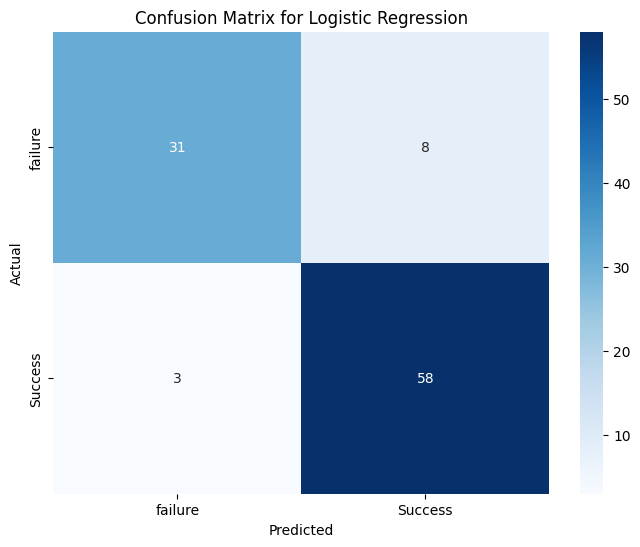

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the resampled training data with selected features
model.fit(X_train_selected, y_train)

# Predict on the testing data with selected features
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['failure', 'Success'], yticklabels=['failure', 'Success'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Model Evaluation:
Accuracy: 0.9400

Confusion Matrix:
[[33  6]
 [ 0 61]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        39
           1       0.91      1.00      0.95        61

    accuracy                           0.94       100
   macro avg       0.96      0.92      0.93       100
weighted avg       0.95      0.94      0.94       100



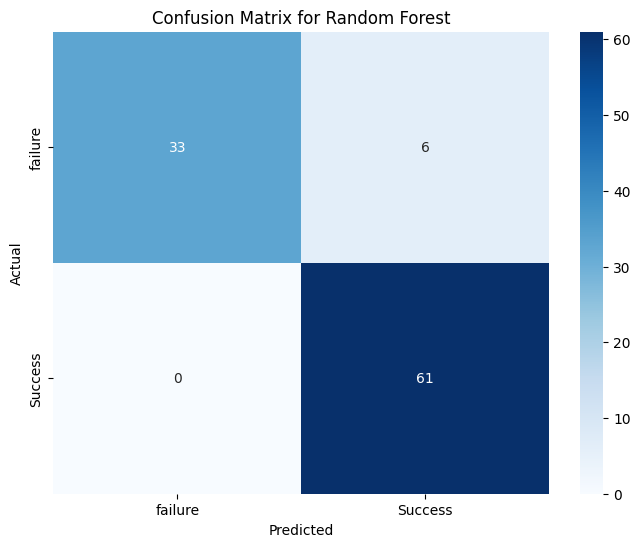

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the resampled training data with selected features
rf_model.fit(X_train_selected, y_train)

# Predict on the testing data with selected features
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

# Optional: Visualize the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['failure', 'Success'], yticklabels=['failure', 'Success'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Support Vector Machine Model Evaluation:
Accuracy: 0.9100

Confusion Matrix:
[[31  8]
 [ 1 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        39
           1       0.88      0.98      0.93        61

    accuracy                           0.91       100
   macro avg       0.93      0.89      0.90       100
weighted avg       0.92      0.91      0.91       100



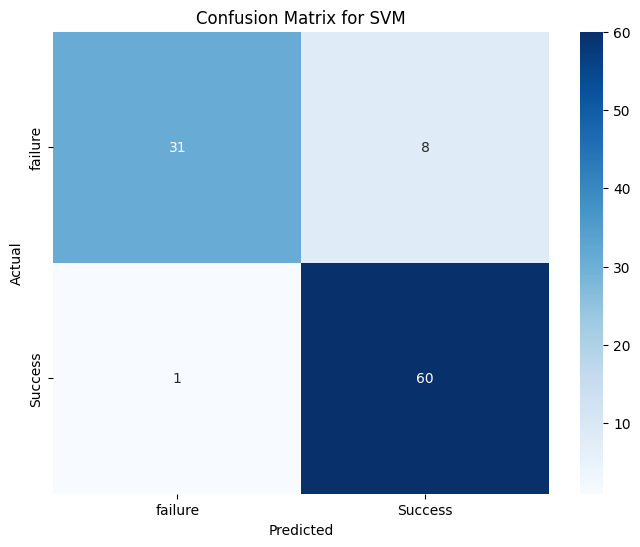

In [81]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model using the resampled training data with selected features
svm_model.fit(X_train_selected, y_train)

# Predict on the testing data with selected features
y_pred_svm = svm_model.predict(X_test_selected)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("\nSupport Vector Machine Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

# Optional: Visualize the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['failure', 'Success'], yticklabels=['failure', 'Success'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:50:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Accuracy: 0.9100

Confusion Matrix:
[[32  7]
 [ 2 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.89      0.97      0.93        61

    accuracy                           0.91       100
   macro avg       0.92      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



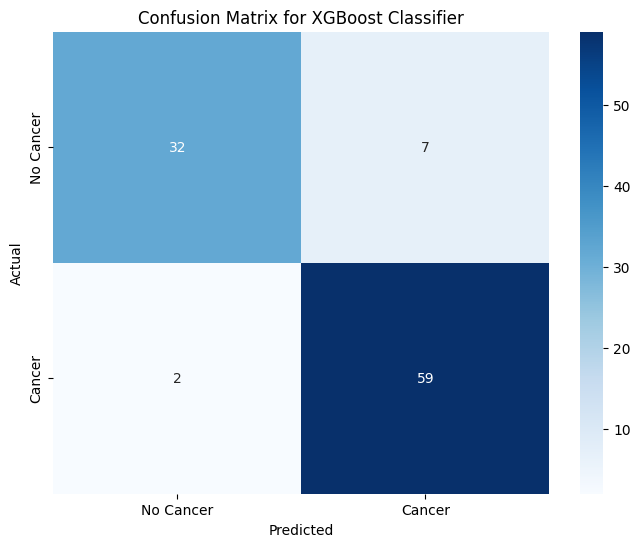

In [82]:
import xgboost as xgb

# Initialize the XGBoost classifier
# For regression, you would use xgb.XGBRegressor
# Since the target variable is binary (0 or 1), we use a classifier here
# Use `objective='binary:logistic'` for binary classification
# Use `eval_metric='logloss'` for evaluation
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the XGBoost model using the resampled training data with selected features
# You can also add early stopping with a validation set
# xgb_model.fit(X_train_selected, y_train_resampled,
#               eval_set=[(X_test_selected, y_test)],
#               early_stopping_rounds=10, verbose=False)

xgboost_model.fit(X_train_selected, y_train)


# Predict on the testing data with selected features
# For classification, .predict() gives class labels (0 or 1)
y_pred_xgb = xgboost_model.predict(X_test_selected)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

# Optional: Visualize the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()